In [3]:
#Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
from astropy.timeseries import LombScargle

In [4]:
def make_timeseries(nbins=10000,binperiod=300,startbin=55,dipdepth=-50):
    '''
    Generate a synthetic timeseries with nbins number of bins, zero mean, noise standard deviation of 1.0 
    and a dip of -50 every binperiod number of bins (starting at bin 55)
    '''
    noise = np.random.normal(loc=0.0, scale=1.0, size=nbins)
    signal = np.zeros(nbins)
    dips = np.arange(0,nbins,binperiod)
    for jj in dips:
        for ii in np.arange(len(signal)):
            if ii > startbin-1+jj and ii < startbin+1+jj:
                signal[ii] = dipdepth
    time_series = noise + signal
    return time_series

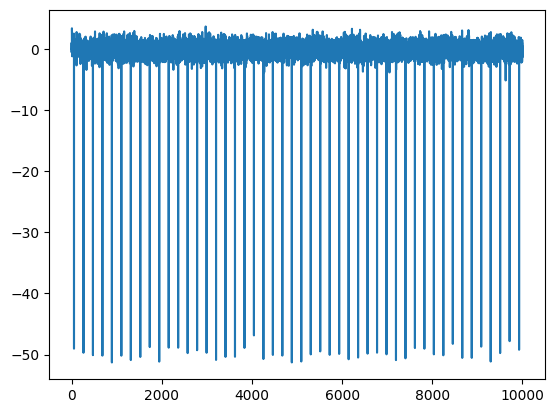

In [5]:
#Generate and plot a synthetic time series with dips
nbins=10000
binperiod=210
time_series = make_timeseries(nbins=nbins,binperiod=binperiod)
times = np.arange(0,nbins,1)
plt.plot(time_series)

There is a dip every 204.48 bins


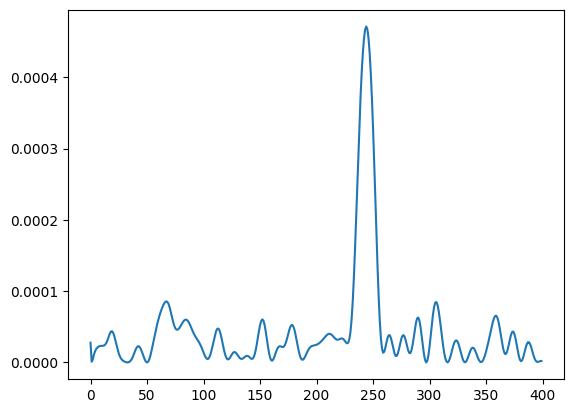

In [6]:
#Calculate the periodogram of the timeseries
frequency, power = LombScargle(times,time_series).autopower()
#Zoom in on the powers at close to 0 frequency to find the first peak (the "fundamental") 
#and its corresponding period (in number of bins)
#Note that there are many harmonics because the dip is very sharp
maxbin = 400
plt.plot(power[:maxbin])
print(f"There is a dip every {np.round(1./frequency[np.argmax(power[:maxbin])], 2)} bins")

In [7]:
help(LombScargle)

Help on class LombScargle in module astropy.timeseries.periodograms.lombscargle.core:

class LombScargle(astropy.timeseries.periodograms.base.BasePeriodogram)
 |  LombScargle(t, y, dy=None, fit_mean=True, center_data=True, nterms=1, normalization='standard')
 |  
 |  Compute the Lomb-Scargle Periodogram.
 |  
 |  This implementations here are based on code presented in [1]_ and [2]_;
 |  if you use this functionality in an academic application, citation of
 |  those works would be appreciated.
 |  
 |  Parameters
 |  ----------
 |  t : array-like or `~astropy.units.Quantity` ['time']
 |      sequence of observation times
 |  y : array-like or `~astropy.units.Quantity`
 |      sequence of observations associated with times t
 |  dy : float, array-like, or `~astropy.units.Quantity`, optional
 |      error or sequence of observational errors associated with times t
 |  fit_mean : bool, optional
 |      if True, include a constant offset as part of the model at each
 |      frequency. This